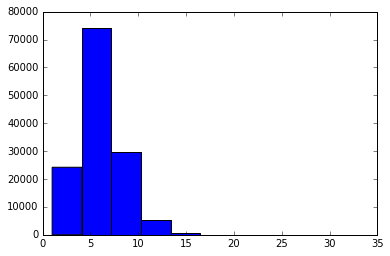

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 

f = open('cmudict-0.7b','r')

symbol_array = np.asarray([],dtype=str)
word_array = np.asarray([],dtype=str)
syl_len_array = np.asarray([])
real_word_array = np.asarray([],dtype=str)
for i,line in enumerate(f):
    syllables = line.split('  ')[1][:-1].split(' ')
    syl_len_array = np.append(syl_len_array,len(syllables))
    word_array = np.append(word_array,line.split('  ')[1][:-1])
    real_word_array = np.append(real_word_array,line.split('  ')[0])
    symbol_array = np.append(symbol_array,syllables)



plt.hist(syl_len_array)
plt.show()

In [2]:
common_words = np.loadtxt('top1kwords.dat',usecols=(0,),dtype=str)
new_real_word_array = np.asarray([x.lower() for x in real_word_array])
for word in common_words:
    print word,np.where(word==new_real_word_array)


the (array([119742]),)
of (array([85524]),)
to (array([120871]),)
and (array([3894]),)
a (array([0]),)
in (array([58271]),)
is (array([60487]),)
it (array([60686]),)
you (array([132692]),)
that (array([119715]),)
he (array([52952]),)
was (array([128392]),)
for (array([43423]),)
on (array([86068]),)
are (array([5272]),)
with (array([131135]),)
as (array([5836]),)
I (array([], dtype=int64),)
his (array([54929]),)
they (array([119923]),)
be (array([9286]),)
at (array([6285]),)
one (array([86099]),)
have (array([52780]),)
this (array([120039]),)
from (array([44769]),)
or (array([86407]),)
had (array([51114]),)
by (array([16841]),)
hot (array([56213]),)
word (array([131613]),)
but (array([16694]),)
what (array([129563]),)
some (array([112197]),)
we (array([128656]),)
can (array([17606]),)
out (array([87095]),)
other (array([87004]),)
were (array([129254]),)
all (array([2697]),)
there (array([119864]),)
when (array([129675]),)
up (array([124959]),)
use (array([125221]),)
your (array([132738]

In [4]:
num_word_log = []
for k in np.arange(0,2):
    print k
    spirit_recording_inds = np.random.choice(np.arange(len(symbol_array)),200)
    other_inds_array = spirit_recording_inds + 1
    spirit_recording = [None]*(2*len(spirit_recording_inds))
    spirit_recording[::2] = symbol_array[spirit_recording_inds]
    spirit_recording[1::2] = symbol_array[other_inds_array]
    spirit_recording = np.asarray(spirit_recording)

    counter = 0
    len_log = []
    for j in np.arange(3,11):
        for k in np.arange(len(spirit_recording)-j+1):
            if " ".join(spirit_recording[k:k+j]) in word_array:
                gind = np.where(word_array == " ".join(spirit_recording[k:k+j]))
                if new_real_word_array[gind][0] in common_words:
                    #print " ".join(spirit_recording[k:k+j]),real_word_array[np.where(word_array==" ".join(spirit_recording[k:k+j]))]
                    spirit_recording[k:k+j]='?'
                    print new_real_word_array[gind][0]
                    counter = counter+1
                    len_log = np.append(len_log, j)
    num_word_log = np.append(num_word_log, counter)

print "log"
print num_word_log
print "avg"
print np.mean(num_word_log), np.mean(len_log)
print "std"
print np.std(num_word_log), np.std(len_log)
    
    
    
    

0
one
car
ten
top
arrive
1
son
any
allow
log
[ 5.  3.]
avg
4.0 3.0
std
1.0 0.0


In [6]:
#search recording for words...

spirit_recording_inds = np.random.choice(np.arange(len(symbol_array)),200)
other_inds_array = spirit_recording_inds + 1
spirit_recording = [None]*(2*len(spirit_recording_inds))
spirit_recording[::2] = symbol_array[spirit_recording_inds]
spirit_recording[1::2] = symbol_array[other_inds_array]
spirit_recording = np.asarray(spirit_recording)


In [13]:
import os
new_spirit_recording = spirit_recording
originals,replacements = np.loadtxt('cmusymbol.dat',unpack=True,dtype=str)
for i,original in enumerate(originals):
    replacement = replacements[i]
    gind = np.where(new_spirit_recording == original)
    new_spirit_recording[gind] = replacement

indices = np.random.choice(np.arange(len(new_spirit_recording)),int(0.15*len(new_spirit_recording)))
new_spirit_recording = np.insert(new_spirit_recording,indices,'')
print new_spirit_recording

#NOTE WHISPER WAS REMOVED FROM MAC RECENTLY...YOU'LL NEED TO DOWNLOAD THE VOICE :'(
#But you can run this anyway by just removing the 'v whisper' from the command

#spirit_words = "[[inpt PHON]]"+"".join(new_spirit_recording)+"[[inpt TEXT]]"
#os.system("say -v whisper '"+spirit_words+"'") 
os.system("say -v whisper 'eye dee kay spoooooooky stuff'") 
#os.system("say -v whisper 'brown and white'") 
#os.system("say -v whisper '[[inpt PHON]]brAWnAXnd%%w%AYt[[inpt TEXT]]'") 

['t' 'r' 'd' '' '' 'IH' 'AX' '' 'z' 's' '' 'AW' 'b' 'IH' 'IH' 'z' 'm' 'AA'
 'l' 'm' 'l' '' 'z' 'n' 'b' 'z' 'f' 'AY' 't' '' 'v' 'AA' 'm' 'AA' 'l' 'IH'
 '' 'AE' 'r' '' 'n' 'AA' 'z' '' 'p' 'n' '' 'AE' 'k' 'n' 'AA' 'l' 's' 's'
 's' 'y' 't' 'EY' 'l' 'f' 'IH' '' 'n' 'n' 'k' 'C' 'AE' 's' 'AA' 'd' 'r' 'h'
 'OY' 'IY' 'p' 'EY' 'n' 'l' 'IH' 'k' 'AA' 'EH' 'm' 'b' 'r' 'UW' 't' 'n' 'd'
 'IH' 'n' 'AA' '' 'AX' '' 's' '' 'AX' 'AY' '' 'k' 'r' '' 'AY' 'EH' 'p' 's'
 'IH' 'IH' 'n' '' 'n' 'z' 'r' 'IH' 's' 'IY' 'n' 'AA' 'r' 'v' 'n' 'EH' ''
 'r' 'AA' 'IY' 'd' '' 'm' 'b' 'UW' 'm' 's' 't' '' 'UW' 'm' 'z' 'y' 'n' 'n'
 'IY' 'k' 'g' 'r' 's' 'AA' 'AA' 'n' 'AO' 'n' 'AA' 't' 'l' 'r' 'r' 'k' 'b'
 'r' 'r' 'r' 'AA' 'z' 'n' 'b' 'k' 'AA' 'AO' 'g' 'IY' 's' '' 's' 't' 'AE' ''
 'p' 'g' 'AX' 'd' 'AA' '' 'IY' 'k' 's' 'k' 'm' 's' 'd' 'AX' 'l' 'z' 'AA'
 'n' 'h' '' 'IH' 'IY' 'p' 'IH' 'J' 'k' '' 's' 'n' 't' 'IH' 'n' 'k' 'OW' 't'
 '' 's' '' 'd' 'g' 'k' 'v' 'AO' '' 't' '' 'AX' 'v' 'l' 'IH' 'EH' 'k' 'v'
 'IY' 'AA' 'v' 'n' 'OW' 'EH' '

0

# 